## Problem 1 [Waiting]
Use the inverse CDF method to generate independent samples, Xi, of the exponential
random variable with average waiting time of 0.2 time units. Evaluate the quality of your
generator with goodness of fit tests.

Let $X \sim exp(\theta)$

\begin{align*}
f(x) &= \frac{1}{\theta}\exp{-\frac{x}{\theta}}\\
F(x) &= 1 - \exp{-\frac{x}{\theta}}
\end{align*}

Generate $u ~ U(0,1)$. Since $F(X) \sim U(0,1)$

\begin{align*}
u &= 1-\exp{-\frac{x}{\theta}}\\
x &= -\theta \ln{(1-u)}
\end{align*}

In [15]:
using PyPlot;
using Distributions;
using Gadfly;
using HypothesisTests;
using PyCall
@pyimport networkx as nx
srand(1000);


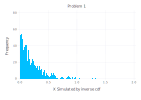

In [2]:
θ = 0.2
u = rand(1000)
x = -θ * log(u)
Gadfly.plot(x=x, Geom.histogram, 
Guide.xlabel("X Simulated by inverse cdf"),
Guide.ylabel("Frequency"),
Guide.title("Problem 1"))

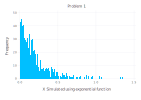

In [3]:
test_y = rand(Exponential(θ), 1000)
Gadfly.plot(x=test_y, Geom.histogram, 
    Guide.xlabel("X Simulated using exponential function"),
     Guide.ylabel("Frequency"),
     Guide.title("Problem 1"))

In [4]:
ExactOneSampleKSTest(x, Exponential(θ))

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.01909113865977996

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.8523074202676089 (not significant)

Details:
    number of observations:   1000


#### The KS test cannot be rejected using 0.05 p-value threshold.

## Problem 2 [Counting]
Each exponential random sample represents the waiting time until an event occurs.
Implement a routine to count the number of events that occur in 1 unit of time. Generate
such counts for 1000 separate unit time intervals. How are these counts distributed? Justify
your answer



In [5]:
function simulate_one_unit(θ)
    total_time = 0
    counts = 0
    while total_time<=1
        total_time+=rand(Exponential(θ))
        counts+=1
    end
    return counts
end

counts = [simulate_one_unit(θ) for n=1:1000];

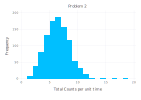

In [6]:
Gadfly.plot(x=counts, Geom.histogram, 
Guide.xlabel("Total Counts per unit time"),
     Guide.ylabel("Frequency"),
Guide.title("Problem 2"))

The counts are poisson distributed. Consider $X_i$ to be the inter-arrival times between the $i^{th}$ and $(i+1)^{th}$ arrival. Let $N(t)$ represent the count in time $t$.

Consider $P(X_1 > t) = P(\text{No arrivals in time }[0,t)) = P(N(t)=0) = e^{-\lambda t}$

Thus, $P(X_1 <t) =1-e^{-\lambda t}$ which is the cdf of exponential distribution.

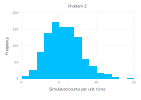

In [7]:
test_y = rand(Poisson(1/θ), 1000)
Gadfly.plot(x=test_y, Geom.histogram, 
Guide.xlabel("Simulated counts per unit time"),
     Guide.ylabel("Frequency"),
Guide.title("Problem 2"))

## Problem 3 [Networking]
Given n=50 people at a networking event. Imagine that any given unordered pair of two
people connect at random and independently with probability p.
Generate and plot sample networks for each value of p={0.02, 0.09}. Briefly discuss the
structure of these sample graphs.



In [8]:
function generate_graph(p,n)
    samples = [x for x=1:n];
    data = zeros(n,n)
    for i=1:n
        for j=1:n
            edge = rand(Bernoulli(p))
            if edge>=1
                data[i,j] = edge
            end
        end
    end
    return data;
end

generate_graph (generic function with 1 method)

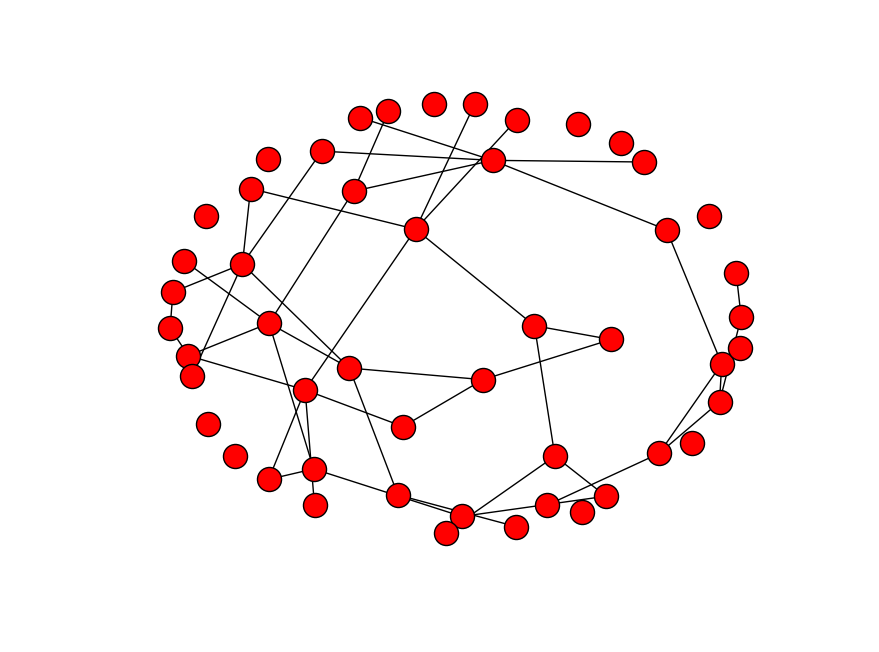

In [9]:
n = 50;
p = 0.02;
data1 = generate_graph(p, n)
G=nx.from_numpy_matrix(data1)
nx.draw(G, with_levels=true)

#### The graphs in first case(n=50, p=0.02) are sparse. More number of edges come when weincrease $p=0.09$ in the second case

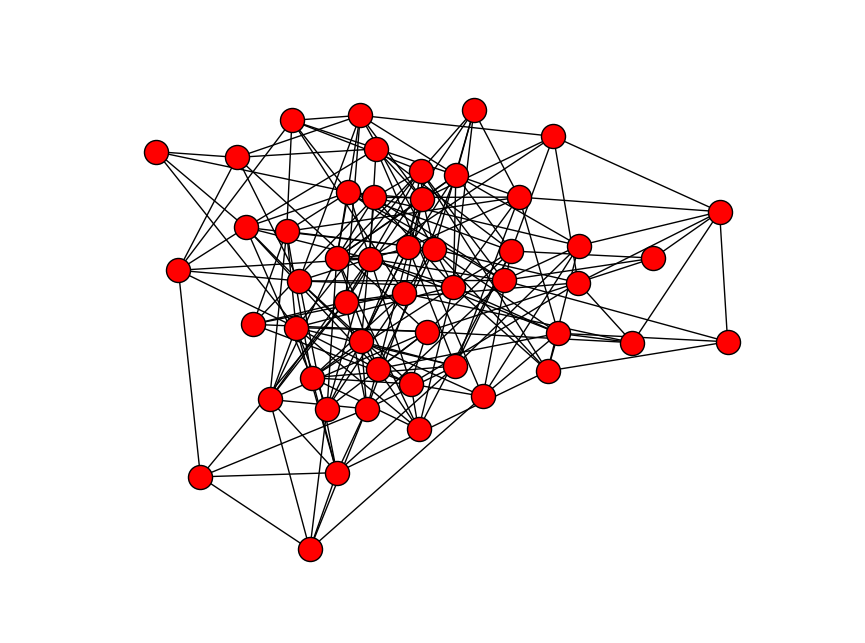

In [10]:
n = 50;
p = 0.09;
data2 = generate_graph(p, n)
G = nx.from_numpy_matrix(data2)
nx.draw(G, with_levels=true)

## Problem 4 [Networking at larger scale]
Count the number of connections (edges) to a vertex (node) in one of your sample
networks from Problem 3. This statistic is the degree of that vertex. The vertex degrees for
all vertices in a random network are random. Vertex degree is a binomially distributed
statistic for small networks.
Plot a histogram of vertex degrees for one of your sample networks in Problem 3. Repeat
for the other sample network.
Generate a network with (n, p) = (250, 0.08) and plot the histogram of its vertex degrees.
What distribution fits this data? Justify your claim with any probabilistic limit laws you
know. 

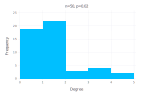

In [11]:
degrees1 = sum(data1,1);
Gadfly.plot(x=degrees1, Geom.histogram, 
Guide.xlabel("Degree"),
Guide.ylabel("Frequency"), 
Guide.title("n=50, p=0.02"))

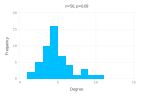

In [12]:
degrees2 = sum(data2,1);
Gadfly.plot(x=degrees2, Geom.histogram, 
Guide.xlabel("Degree"),
Guide.ylabel("Frequency"), 
Guide.title("n=50, p=0.09"))

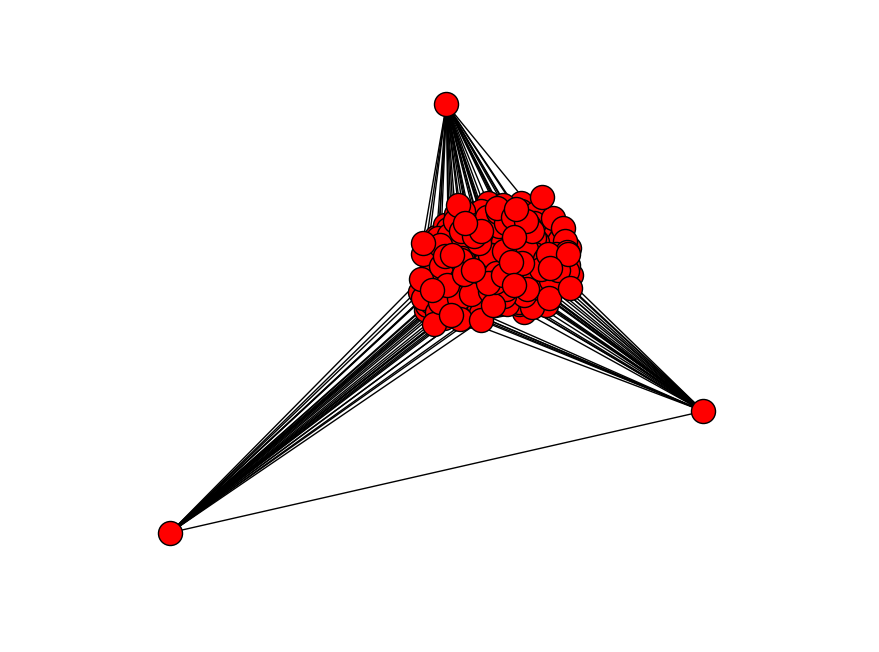

In [13]:
n = 250;
p = 0.08;
data3 = generate_graph(p, n)
G = nx.from_numpy_matrix(data3)
nx.draw(G, with_levels=true)

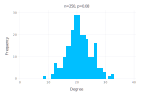

In [14]:
degrees3 = sum(data3,1);
Gadfly.plot(x=degrees3, Geom.histogram, 
Guide.xlabel("Degree"),
Guide.ylabel("Frequency"), 
Guide.title("n=250, p=0.08"))

#### The distribution looks normal. The explainiation is straightforward. Binomial distribution can be approaximated by normal for large $n$